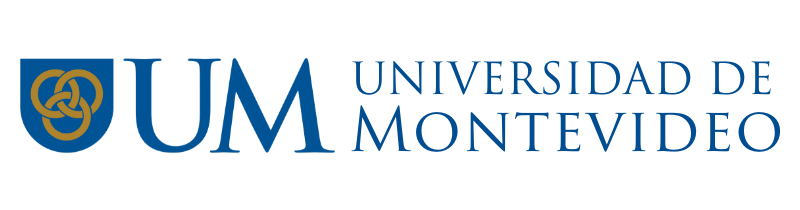

# Curso de Aprendizaje Automático

# Regresion lineal por minimos cuadrados
## Predicción del valor de una vivienda a partir del número medio de habitaciones

In [1]:
import numpy as np
import sklearn as s
import matplotlib.pyplot as plt


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print (boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

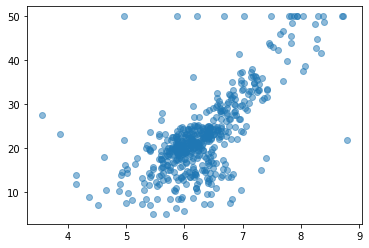

In [3]:
# Número medio de habitaciones por vivienvia
X = boston.data[:,5]
# Valor de la vivienda
Y = boston.target
plt.scatter(X,Y, alpha=0.5)
plt.show()

Formula para minimizar el error cuadrático: $\beta = (X^{T}X)^{-1}X^{T}Y$

In [6]:
# Se convierte el arreglo en una matriz con dos columnas, a la primera le vamos a colocar 1s
# Esto permite mantener el termino independiente
newX = np.c_[np.ones(X.shape[0]), X]
#   B = (Xt*X)^-1 * Xt*Y 

B = np.linalg.inv(newX.T @ newX) @ newX.T @ Y
print (B)


[-34.67062078   9.10210898]


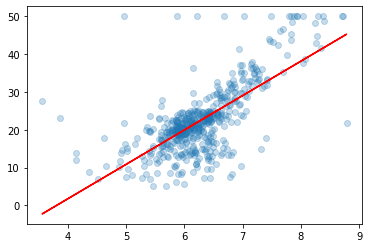

47248.36005418462


In [7]:
def predict_from_room_number(room_number, w):
  return (w[0] + w[1] * room_number) * 1000 # Calcula el valor de Y

plt.scatter(X, Y, alpha=0.25)
plt.plot(X, newX @ B, color="red") # Se multiplica la X ampliada con B, esto es la recta
plt.show()

print(predict_from_room_number(9, B))

# Regresión lineal usando sklearn

In [8]:

from sklearn.linear_model import LinearRegression
newX = np.c_[np.ones(X.shape[0]), X] 
reg = LinearRegression().fit(newX, Y)
reg?
print('Pendiente:', reg.coef_)
print('Término independiente :',reg.intercept_)

reg.predict(np.array([[1, 9]])) * 1000

Pendiente: [0.         9.10210898]
Término independiente : -34.670620776438625


array([47248.36005418])

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

spl = 0.8
N = len(Y)
sample = int(spl*N)

# Partimos los dos arrays en entrenamiento 
X_train, X_test, Y_train, Y_test = X[:sample], X[sample:], Y[:sample], Y[sample:]

newX_train = np.c_[np.ones(X_train.shape[0]), X_train] 
newX_test = np.c_[np.ones(X_test.shape[0]), X_test] 

# Creamos una instancia del modelo de regresion por minimos cuadrados
regr = linear_model.LinearRegression()

# Entrenamos el modelo usando los datos de entrenamiento
regr.fit(newX_train, Y_train)

# Hacemos predicciones usando los datos de test
Y_pred = regr.predict(newX_test)

print(Y_pred)
print (Y_test)

print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, Y_pred))

print (Y_pred)


#print (boston_y_train.size)
#print (boston_y_test.size)

[16.59098419 18.02829932  3.4187475  17.31909778 17.40420196 29.0823874
 18.72804485 27.23846338  8.05219759 13.03552045  7.02149135 25.12977079
 28.42046596 14.44446752 20.61924897 28.81761882 24.91228232 21.08259398
 17.6973386  21.99982797 16.91248889 20.04243171 19.48452649 22.93597401
 22.85086983 24.61914568 24.31655302 28.90272301 25.04466661 25.14868283
 22.99271014 26.97369481 25.38508335 22.46317298 20.41121651 17.49876217
 19.3048621  24.86500221 23.09672636 25.61202784 19.64527884 25.36617131
 24.25036088 23.39931902 22.77522166 24.96901844 28.10841728 27.21955134
 23.83429597 34.19809454 27.90984085 25.99026867 20.79891336 20.42067253
 23.87212005 21.79179552 27.65452829 24.5813216  24.02341638 25.87679642
 23.00216616 18.74695689 20.57196886 21.05422591 20.32611233 18.31197994
 22.60501329 23.19128657 25.15813885 30.29275804 15.60755805 22.55773319
 25.60257182 14.44446752 22.77522166 23.19128657 23.31421484 28.1178733
 31.05869571 18.77532495 19.80603119 23.97613628 22.1